In [1]:
# Importação de bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

# Importando as bibliotecas de machine learning

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
""" Utilizando a função 'read_csv' do Pandas para ler o arquivo CSV "iris.data"
e armazená-lo em um DataFrame chamado 'dataset'."""

dataset = pd.read_csv("iris.csv")
#print(dataset)

In [3]:
""" Esse método fornece informações resumidas, como média, desvio padrão, mínimo, máximo e quartis,
para todas as colunas numéricas do conjunto de dados."""
dataset.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#Fazendo a estatística descritiva individualmente
print(f'media: {dataset["sepal.length"].mean()}')
print(f'desvio padrão: {dataset["sepal.length"].std()}')
print(f'moda: {dataset["sepal.length"].mode()}\n')
print(dataset["sepal.width"])

media: 5.843333333333334
desvio padrão: 0.828066127977863
moda: 0    5.0
Name: sepal.length, dtype: float64

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal.width, Length: 150, dtype: float64


([<matplotlib.patches.Wedge at 0x7ea9f56494b0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris-setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris-virginica'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris-versicolor')])

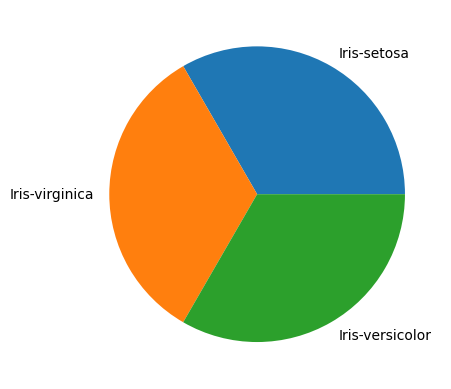

In [5]:
# Definindo os rótulos para as fatias do gráfico de pizza.
labels = 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'
# Definindo os tamanhos (ou valores) correspondentes a cada fatia do gráfico de pizza.
sizes = [50, 50, 50]

# Criando uma figura (um espaço para gráficos) e um eixo (uma área dentro da figura) usando a Matplotlib.
fig, ax = plt.subplots()

# Gerando um gráfico de pizza (pie chart) com os tamanhos e rótulos especificados.
ax.pie(sizes, labels=labels)

([<matplotlib.patches.Wedge at 0x7ea9f3526260>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33%')])

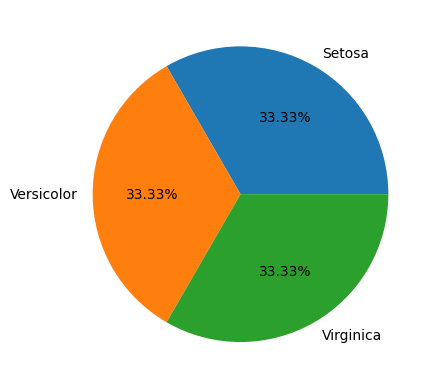

In [6]:
x = dataset["variety"].value_counts()
# 'x' contém as contagens e 'x.index' contém os rótulos das fatias.
# 'autopct' define o formato de exibição das porcentagens nas fatias como dois decimais.
plt.pie(x, labels=x.index, autopct='%.2f%%')

In [7]:
# Carrega os valores de X e y do meu dataset.
X = dataset.drop(['variety'], axis=1)
print(X)

# Cria uma série 'y' que contém a coluna 'variety' do DataFrame 'dataset'.
y = dataset['variety']

# Imprime a série 'y', que contém os rótulos (ou classes) associados aos dados de 'X'.
print(y)

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object


In [8]:
# Dividir os dados em treino e teste

# 'X' representa as características (atributos) do conjunto de dados.
# 'y' representa os rótulos (classes) associados às amostras.

# 'test_size=0.25' indica que 25% dos dados serão usados como conjunto de teste, enquanto 75% serão usados como conjunto de treinamento.

# 'random_state=50' é uma semente aleatória que garante que a divisão seja reproduzível, ou seja, os mesmos resultados serão obtidos sempre que esse código for executado com a mesma semente.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

# Criar um modelo SVM com um kernel específico
svm_modelo = SVC(kernel='linear')

# Treinar o modelo SVM usando os dados de treinamento.
# 'svm_modelo' é o objeto do modelo SVM que você criou anteriormente.
svm_modelo.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
# Fazer previsões usando o modelo SVM treinado.
""" 'X_test' é o conjunto de teste de características, que contém as amostras para as quais você deseja fazer previsões.
    'y_predicao' será o resultado das previsões feitas pelo modelo para as amostras em 'X_test'."""
y_predicao = svm_modelo.predict(X_test)

#Acurácia: Mede a proporção de previsões corretas.
accuracy = accuracy_score(y_test, y_predicao)
print(f'Acurácia: {accuracy:.2f}')

""" Matriz de Confusão (Confusion Matrix): Mostra o número de verdadeiros positivos,
 verdadeiros negativos, falsos positivos e falsos negativos. """
cm = confusion_matrix(y_test, y_predicao)
print('Matriz de Confusão:')
print(cm)

"""Relatório de Classificação (Classification Report): Fornece uma visão geral das métricas de classificação,
incluindo precisão, recall e F1-score para cada classe."""
report = classification_report(y_test, y_predicao)
print('Relatório de Classificação:')
print(report)

Acurácia: 0.95
Matriz de Confusão:
[[11  0  0]
 [ 0 13  2]
 [ 0  0 12]]
Relatório de Classificação:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.87      0.93        15
   Virginica       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.96      0.95        38
weighted avg       0.95      0.95      0.95        38

